# One-Day Anlaysis

In [105]:
# Initial imports
import os
import json
import requests
import pandas as pd
import panel as pn
import seaborn as sns
from panel.interact import interact
import plotly_express as px
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [106]:
# Load .env enviroment variables
load_dotenv()

True

In [107]:
# Set Alpaca API key and secret
alpaca_api = os.getenv("ALPACA_API")
alpaca_secret = os.getenv("ALPACA_SECRET")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api,
    alpaca_secret,
    api_version = "v2"
)

In [108]:
# Format current date as ISO format
start_date = pd.Timestamp("2018-12-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-06", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG", "SHOP", "PLD", "TTWO", "ATVI", "NVDA", "AMD",
          "PEP", "MKC", "DPZ", "WING", "COST", "ETSY", "CPB", "OKTA", "ZM"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get price data for 20 picks 
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Drop any rows with NaN
ticker_data.dropna(inplace=True)
ticker_data.isna().sum()


# Preview DataFrame
ticker_data.head(20)


AAPL                                       \
                              open      high      low   close    volume   
time                                                                      
2019-04-18 00:00:00-04:00  203.120  204.1500  202.520  203.86  21928367   
2019-04-22 00:00:00-04:00  202.830  204.9400  202.340  204.64  13720923   
2019-04-23 00:00:00-04:00  204.430  207.7500  203.900  207.51  19401417   
2019-04-24 00:00:00-04:00  207.360  208.4800  207.050  207.18  14914939   
2019-04-25 00:00:00-04:00  206.830  207.7600  205.120  205.24  15908807   
2019-04-26 00:00:00-04:00  204.900  205.0000  202.120  204.29  16315669   
2019-04-29 00:00:00-04:00  204.400  205.9700  203.860  204.61  19641066   
2019-04-30 00:00:00-04:00  203.060  203.4000  199.110  200.57  35362106   
2019-05-01 00:00:00-04:00  209.880  215.3100  209.230  210.52  57751414   
2019-05-02 00:00:00-04:00  209.840  212.6500  208.130  209.17  29014844   
2019-05-03 00:00:00-04:00  210.740  211.8400  210.230  211.78  17987793   
2019-05-06 00:00:00-04:00  204.290  208.8400  203.500  208.60  28949691   
2019-05-07 00:00:00-04:00  205.880  207.4175  200.825  202.86  34328425   
2019-05-08 00:00:00-04:00  201.900  205.3400  201.750  202.90  22729670   
2019-05-09 00:00:00-04:00  200.400  201.6800  196.660  200.72  32427147   
2019-05-10 00:00:00-04:00  197.419  198.8500  192.770  197.30  36118438   
2019-05-13 00:00:00-04:00  187.710  189.4800  182.850  185.72  50491792   
2019-05-14 00:00:00-04:00  186.410  189.7000  185.410  188.65  31498214   
2019-05-15 00:00:00-04:00  186.270  191.7500  186.020  190.92  23655393   
2019-05-16 00:00:00-04:00  189.910  192.4689  188.840  190.14  28660083   

                             AMD                                        ...  \
                            open     high      low    close     volume  ...   
time                                                                    ...   
2019-04-18 00:00:00-04:00  27.60  27.8800  27.3400  27.6767   37302337  ...   
2019-04-22 00:00:00-04:00  27.62  28.2300  27.3900  28.1700   33846781  ...   
2019-04-23 00:00:00-04:00  28.18  28.4900  27.7900  27.9700   37974538  ...   
2019-04-24 00:00:00-04:00  28.10  28.8500  27.9300  28.4600   48395877  ...   
2019-04-25 00:00:00-04:00  28.65  28.8600  27.3600  27.6500   51487295  ...   
2019-04-26 00:00:00-04:00  27.62  27.9000  27.0500  27.8800   44699014  ...   
2019-04-29 00:00:00-04:00  27.90  28.1400  27.5000  27.6811   40385475  ...   
2019-04-30 00:00:00-04:00  27.59  27.8000  26.9400  27.6300   54019126  ...   
2019-05-01 00:00:00-04:00  28.95  29.1500  26.7800  26.8000  127287384  ...   
2019-05-02 00:00:00-04:00  26.94  28.6400  26.6100  28.2900   95312594  ...   
2019-05-03 00:00:00-04:00  28.30  28.4201  27.6600  28.2200   51718501  ...   
2019-05-06 00:00:00-04:00  26.72  27.5000  26.4500  27.4300   64760337  ...   
2019-05-07 00:00:00-04:00  27.20  27.3500  26.2100  26.6600   70007742  ...   
2019-05-08 00:00:00-04:00  26.41  27.7100  26.2700  27.0900   62428679  ...   
2019-05-09 00:00:00-04:00  26.70  27.3800  26.0300  27.2000   69825507  ...   
2019-05-10 00:00:00-04:00  27.03  28.1000  26.9300  27.9500   79121383  ...   
2019-05-13 00:00:00-04:00  26.98  27.2300  26.1000  26.2400   92488651  ...   
2019-05-14 00:00:00-04:00  26.53  27.4800  26.1500  27.3100   76955796  ...   
2019-05-15 00:00:00-04:00  26.87  27.7900  26.7300  27.5800   52483356  ...   
2019-05-16 00:00:00-04:00  27.37  28.3700  27.2699  28.0200   60976490  ...   

                            WING                                       ZM  \
                            open     high    low  close     volume   open   
time                                                                        
2019-04-18 00:00:00-04:00  76.08  78.4500  75.90  77.95   318224.0  65.00   
2019-04-22 00:00:00-04:00  77.53  78.8700  76.30  77.04   318655.0  61.00   
2019-04-23 00:00:00-04:00  77.05  78.4700  76.53  77.22   362748.0  66.87   
2019-04-24 00:00:00-04:0

In [109]:
# Import S&P500 historical data
sp500_file = Path("./Resources/snp_data_5Y.csv")
sp500_df = pd.read_csv(sp500_file, index_col="Date", infer_datetime_format=True,parse_dates=True)
sp500_df.index = sp500_df.index.date
sp500_df.drop(columns=['Volume', 'Open', 'High', 'Low'], inplace=True)
sp500_df.columns=['S&P 500']
sp500_df.head()

,S&P 500
2021-05-28,4204.11
2021-05-27,4200.88
2021-05-26,4195.99
2021-05-25,4188.13
2021-05-24,4197.05


In [110]:
# Create baseline dateframe to set up analysis dataframes
baseline_df = ticker_data.iloc[220:223]
baseline_df

# Concatenate S&P500 Data
# Create closing prices dataframe to compare to 2019 baseline
closing_df = pd.DataFrame()

closing_df["AAPL"] = baseline_df["AAPL"]["close"]
closing_df["AMD"] = baseline_df["AMD"]["close"]
closing_df["AMZN"] = baseline_df["AMZN"]["close"]
closing_df["ATVI"] = baseline_df["ATVI"]["close"]
closing_df["COST"] = baseline_df["COST"]["close"]
closing_df["CPB"] = baseline_df["CPB"]["close"]
closing_df["DPZ"] = baseline_df["DPZ"]["close"]
closing_df["ETSY"] = baseline_df["ETSY"]["close"]
closing_df["FB"] = baseline_df["FB"]["close"]
closing_df["GOOG"] = baseline_df["GOOG"]["close"]
closing_df["MKC"] = baseline_df["MKC"]["close"]
closing_df["NFLX"] = baseline_df["NFLX"]["close"]
closing_df["NVDA"] = baseline_df["NVDA"]["close"]
closing_df["OKTA"] = baseline_df["OKTA"]["close"]
closing_df["SHOP"] = baseline_df["SHOP"]["close"]
closing_df["PEP"] = baseline_df["PEP"]["close"]
closing_df["PLD"] = baseline_df["PLD"]["close"]
closing_df["TTWO"] = baseline_df["TTWO"]["close"]
closing_df["WING"] = baseline_df["WING"]["close"]
closing_df["ZM"] = baseline_df["ZM"]["close"]

# Drop the time component of the date
closing_df.index = closing_df.index.date

#Concatenate S&P500 data to closing prices
closing_df = pd.concat([closing_df, sp500_df], axis='columns', join='inner')

closing_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,SHOP,PEP,PLD,TTWO,WING,ZM,S&P 500
2020-03-05,292.92,48.14,1924.03,61.520,315.490,53.10,333.03,62.15,185.02,1317.92,...,372.78,273.29,129.05,498.3800,138.10,89.72,117.31,79.56,125.00,3023.94
2020-03-06,288.98,48.60,1901.14,59.960,311.340,51.75,336.47,60.61,181.11,1298.41,...,368.90,266.07,125.99,472.0877,137.27,85.83,117.71,79.28,114.33,2972.37
2020-03-09,266.09,43.26,1800.01,57.165,300.945,50.19,336.26,58.50,168.60,1214.51,...,346.03,245.01,114.86,417.6100,130.15,77.76,113.83,74.76,113.75,2746.56


In [111]:
# Create day high prices dataframe to compare to 2019 baseline
high_df = pd.DataFrame()

high_df["AAPL"] = baseline_df["AAPL"]["high"]
high_df["AMD"] = baseline_df["AMD"]["high"]
high_df["AMZN"] = baseline_df["AMZN"]["high"]
high_df["ATVI"] = baseline_df["ATVI"]["high"]
high_df["COST"] = baseline_df["COST"]["high"]
high_df["CPB"] = baseline_df["CPB"]["high"]
high_df["DPZ"] = baseline_df["DPZ"]["high"]
high_df["ETSY"] = baseline_df["ETSY"]["high"]
high_df["FB"] = baseline_df["FB"]["high"]
high_df["GOOG"] = baseline_df["GOOG"]["high"]
high_df["MKC"] = baseline_df["MKC"]["high"]
high_df["NFLX"] = baseline_df["NFLX"]["high"]
high_df["NVDA"] = baseline_df["NVDA"]["high"]
high_df["SHOP"] = baseline_df["SHOP"]["high"]
high_df["PEP"] = baseline_df["PEP"]["high"]
high_df["PLD"] = baseline_df["PLD"]["high"]
high_df["TTWO"] = baseline_df["TTWO"]["high"]
high_df["WING"] = baseline_df["WING"]["high"]
high_df["ZM"] = baseline_df["ZM"]["high"]

# Drop the time component of the date
high_df.index = high_df.index.date
high_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,SHOP,PEP,PLD,TTWO,WING,ZM
2020-03-05,299.55,49.72,1960.72,62.300,324.51,53.8300,340.59,63.2400,188.99,1358.9100,155.29,391.40,283.20,512.3746,141.42,92.86,119.08,82.520,129.83
2020-03-06,290.82,49.54,1910.87,60.875,317.49,52.8500,337.23,62.8800,183.78,1306.2200,151.30,371.31,268.39,491.2000,138.17,86.40,118.71,80.910,122.00
2020-03-09,278.09,46.34,1862.77,59.120,310.33,51.9999,340.18,59.4599,175.00,1254.7599,147.83,357.47,259.40,446.0798,133.35,80.83,118.03,76.635,116.50


In [112]:
# Create volume dataframe to compare to 2019 baseline
volume_df = pd.DataFrame()

volume_df["AAPL"] = baseline_df["AAPL"]["volume"]
volume_df["AMD"] = baseline_df["AMD"]["volume"]
volume_df["AMZN"] = baseline_df["AMZN"]["volume"]
volume_df["ATVI"] = baseline_df["ATVI"]["volume"]
volume_df["COST"] = baseline_df["COST"]["volume"]
volume_df["CPB"] = baseline_df["CPB"]["volume"]
volume_df["DPZ"] = baseline_df["DPZ"]["volume"]
volume_df["ETSY"] = baseline_df["ETSY"]["volume"]
volume_df["FB"] = baseline_df["FB"]["volume"]
volume_df["GOOG"] = baseline_df["GOOG"]["volume"]
volume_df["MKC"] = baseline_df["MKC"]["volume"]
volume_df["NFLX"] = baseline_df["NFLX"]["volume"]
volume_df["NVDA"] = baseline_df["NVDA"]["volume"]
volume_df["SHOP"] = baseline_df["SHOP"]["volume"]
volume_df["PEP"] = baseline_df["PEP"]["volume"]
volume_df["PLD"] = baseline_df["PLD"]["volume"]
volume_df["TTWO"] = baseline_df["TTWO"]["volume"]
volume_df["WING"] = baseline_df["WING"]["volume"]
volume_df["ZM"] = baseline_df["ZM"]["volume"]

# Drop the time component of the date
volume_df.index = volume_df.index.date
volume_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,SHOP,PEP,PLD,TTWO,WING,ZM
2020-03-05,42089988,91468329,4275800,6102055,7607410,4452293.0,758317.0,4264542,21975861,2228282,928695.0,10905823,16273708,3025126,4600228,3343446,2052161,498235.0,27592148.0
2020-03-06,51462221,117513388,4771029,8486587,5612727,2929848.0,777740.0,3067535,21916170,2357964,957087.0,7508021,11648362,5670066,5395583,9124506,4532950,1080468.0,45566924.0
2020-03-09,130952816,144460752,13436736,24405550,4470653,3535435.0,1153477.0,3669665,26168734,3068332,1267982.0,6360040,14140686,5549938,14096128,10493784,2179396,708463.0,12690592.0


## Closing Price Analysis

In [113]:
daily_returns = closing_df.pct_change()
daily_returns.dropna(inplace=True)
daily_returns

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,SHOP,PEP,PLD,TTWO,WING,ZM,S&P 500
2020-03-06,-0.013451,0.009555,-0.011897,-0.025358,-0.013154,-0.025424,0.010329,-0.024779,-0.021133,-0.014804,...,-0.010408,-0.026419,-0.023712,-0.052756,-0.006010,-0.043357,0.003410,-0.003519,-0.085360,-0.017054
2020-03-09,-0.079210,-0.109877,-0.053194,-0.046614,-0.033388,-0.030145,-0.000624,-0.034813,-0.069074,-0.064617,...,-0.061995,-0.079152,-0.088340,-0.115397,-0.051869,-0.094023,-0.032962,-0.057013,-0.005073,-0.075970


In [114]:
cumulative_returns = (1 + daily_returns).cumprod()
cumulative_returns

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,SHOP,PEP,PLD,TTWO,WING,ZM,S&P 500
2020-03-06,0.986549,1.009555,0.988103,0.974642,0.986846,0.974576,1.010329,0.975221,0.978867,0.985196,...,0.989592,0.973581,0.976288,0.947244,0.993990,0.956643,1.003410,0.996481,0.91464,0.982946
2020-03-09,0.908405,0.898629,0.935542,0.929210,0.953897,0.945198,1.009699,0.941271,0.911253,0.921535,...,0.928242,0.896520,0.890043,0.837935,0.942433,0.866696,0.970335,0.939668,0.91000,0.908272


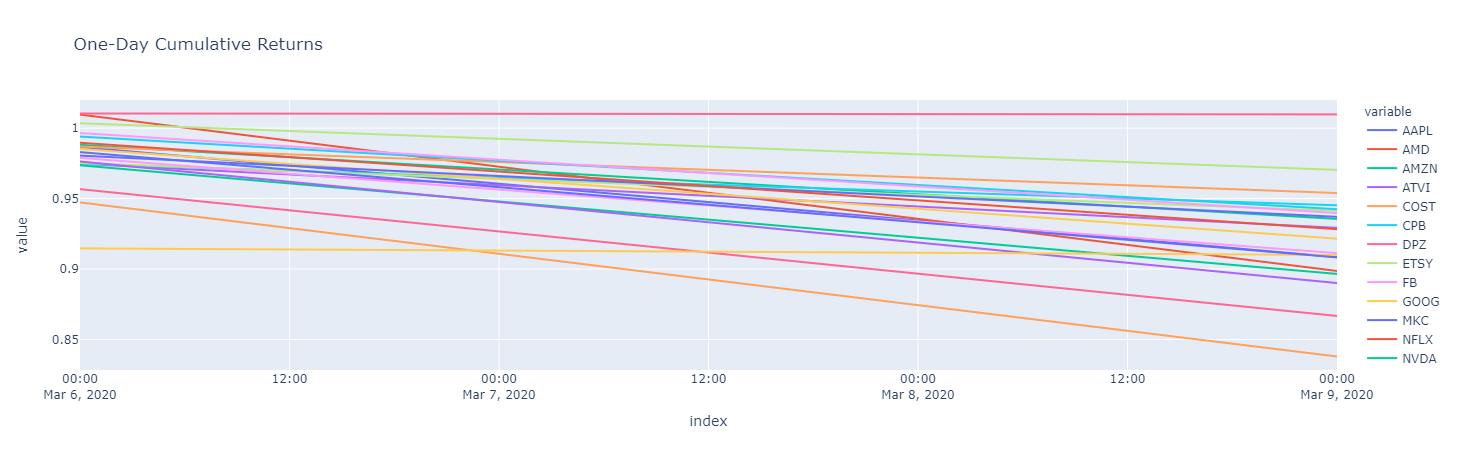

In [115]:
px.line(cumulative_returns, title = "One-Day Cumulative Returns")

In [116]:
standard_deviation = cumulative_returns.std()
standard_deviation

AAPL       0.055256
AMD        0.078437
AMZN       0.037167
ATVI       0.032126
COST       0.023298
CPB        0.020774
DPZ        0.000446
ETSY       0.024006
FB         0.047811
GOOG       0.045015
MKC        0.030718
NFLX       0.043381
NVDA       0.054490
OKTA       0.060985
SHOP       0.077294
PEP        0.036456
PLD        0.063602
TTWO       0.023387
WING       0.040172
ZM         0.003281
S&P 500    0.052803
dtype: float64

In [117]:
correlation = daily_returns.corr()
correlation

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,...,NFLX,NVDA,OKTA,SHOP,PEP,PLD,TTWO,WING,ZM,S&P 500
AAPL,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
AMD,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
AMZN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
ATVI,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
COST,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
CPB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
DPZ,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
ETSY,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
FB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
GOOG,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0


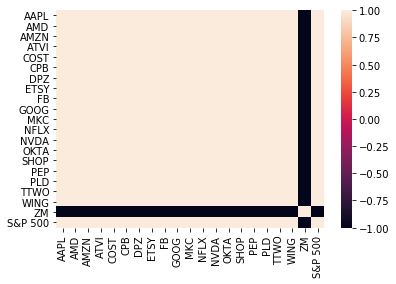

In [118]:
sns.heatmap(correlation, vmin=-1,vmax=1)

In [119]:
# Calculate covariance of stocks against the S&P500 performance
AAPLcovariance = daily_returns["AAPL"].cov(daily_returns["S&P 500"])
AMDcovariance = daily_returns["AMD"].cov(daily_returns["S&P 500"])
AMZNcovariance = daily_returns["AMZN"].cov(daily_returns["S&P 500"])
ATVIcovariance = daily_returns["ATVI"].cov(daily_returns["S&P 500"])
COSTcovariance = daily_returns["COST"].cov(daily_returns["S&P 500"])
CPBcovariance = daily_returns["CPB"].cov(daily_returns["S&P 500"])
DPZcovariance = daily_returns["DPZ"].cov(daily_returns["S&P 500"])
ETSYcovariance = daily_returns["ETSY"].cov(daily_returns["S&P 500"])
FBcovariance = daily_returns["FB"].cov(daily_returns["S&P 500"])
GOOGcovariance = daily_returns["GOOG"].cov(daily_returns["S&P 500"])
MKCcovariance = daily_returns["MKC"].cov(daily_returns["S&P 500"])
NFLXcovariance = daily_returns["NFLX"].cov(daily_returns["S&P 500"])
NVDAcovariance = daily_returns["NVDA"].cov(daily_returns["S&P 500"])
OKTAcovariance = daily_returns["OKTA"].cov(daily_returns["S&P 500"])
SHOPcovariance = daily_returns["SHOP"].cov(daily_returns["S&P 500"])
PEPcovariance = daily_returns["PEP"].cov(daily_returns["S&P 500"])
PLDcovariance = daily_returns["PLD"].cov(daily_returns["S&P 500"])
TTWOcovariance = daily_returns["TTWO"].cov(daily_returns["S&P 500"])
WINGcovariance = daily_returns["WING"].cov(daily_returns["S&P 500"])
ZMcovariance = daily_returns["ZM"].cov(daily_returns["S&P 500"])

In [120]:
# Calculate variance of stocks
AAPLvariance = daily_returns['AAPL'].var()
FBvariance = daily_returns['FB'].var()
AMZNvariance = daily_returns['AMZN'].var()
NFLXvariance = daily_returns['NFLX'].var()
GOOGvariance = daily_returns['GOOG'].var()
SHOPvariance = daily_returns['SHOP'].var()
NVDAvariance = daily_returns['NVDA'].var()
AMDvariance = daily_returns['AMD'].var()
PEPvariance = daily_returns['PEP'].var()
MKCvariance = daily_returns['MKC'].var()
DPZvariance = daily_returns['DPZ'].var()
WINGvariance = daily_returns['WING'].var()
ATVIvariance = daily_returns['ATVI'].var()
COSTvariance = daily_returns['COST'].var()
CPBvariance = daily_returns['CPB'].var()
ETSYvariance = daily_returns['ETSY'].var()
OKTAvariance = daily_returns['OKTA'].var()
PLDvariance = daily_returns['PLD'].var()
TTWOvariance = daily_returns['TTWO'].var()
ZMvariance = daily_returns['ZM'].var()

In [121]:
AAPLbeta = AAPLcovariance / AAPLvariance
print(f'Beta of AAPL is {AAPLbeta}')

FBbeta = FBcovariance / FBvariance
print(f'Beta of FB is {FBbeta}')

AMZNbeta = AMZNcovariance / AMZNvariance
print(f'Beta of AMZN is {AMZNbeta}')

NFLXbeta = NFLXcovariance / NFLXvariance
print(f'Beta of NFLX is {NFLXbeta}')

GOOGbeta = GOOGcovariance / GOOGvariance
print(f'Beta of GOOG is {GOOGbeta}')

SHOPbeta = SHOPcovariance / SHOPvariance
print(f'Beta of SHOP is {SHOPbeta}')

NVDAbeta = NVDAcovariance / NVDAvariance
print(f'Beta of NVDA is {NVDAbeta}')

AMDbeta = AMDcovariance / AMDvariance
print(f'Beta of AMD is {AMDbeta}')

PEPbeta = PEPcovariance / PEPvariance
print(f'Beta of PEP is {PEPbeta}')

MKCbeta = MKCcovariance / MKCvariance
print(f'Beta of MKC is {MKCbeta}')

DPZbeta = DPZcovariance / DPZvariance
print(f'Beta of DPZ is {DPZbeta}')

WINGbeta = WINGcovariance / WINGvariance
print(f'Beta of WING is {WINGbeta}')

ATVIbeta = ATVIcovariance / ATVIvariance
print(f'Beta of ATVI is {ATVIbeta}')

COSTbeta =  COSTcovariance / COSTvariance
print(f'Beta of COST is {COSTbeta}')

CPBbeta = CPBcovariance / CPBvariance
print(f'Beta of CPB is {CPBbeta}')

ETSYbeta = ETSYcovariance / ETSYvariance
print(f'Beta of ETSY is {ETSYbeta}')

OKTAbeta = OKTAcovariance / OKTAvariance
print(f'Beta of OKTA is {OKTAbeta}')

PLDbeta = PLDcovariance / PLDvariance
print(f'Beta of PLD is {PLDbeta}')

TTWObeta = TTWOcovariance / TTWOvariance
print(f'Beta of TTWO is {TTWObeta}')

ZMbeta = ZMcovariance / ZMvariance
print(f'Beta of ZM is {ZMbeta}')

Beta of AAPL is 0.8959365910667914
Beta of FB is 1.2289175008082702
Beta of AMZN is 1.4266185054425746
Beta of NFLX is 1.1420698471645803
Beta of GOOG is 1.1827183545882878
Beta of SHOP is 0.940517186855194
Beta of NVDA is 1.1172407744602335
Beta of AMD is 0.49329968335208574
Beta of PEP is 1.284731177812096
Beta of MKC is 2.3786784750721144
Beta of DPZ is 5.3787033593140645
Beta of WING is 1.1013577881904666
Beta of ATVI is 2.771619647272751
Beta of COST is 2.911750930665302
Beta of CPB is 12.47898561801053
Beta of ETSY is 5.871627589433855
Beta of OKTA is 0.9116051802374284
Beta of PLD is 1.1628275367897294
Beta of TTWO is 1.6198051717581856
Beta of ZM is -0.7338148897818729


## Daily High Comparison

In [122]:
high_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,SHOP,PEP,PLD,TTWO,WING,ZM
2020-03-05,299.55,49.72,1960.72,62.300,324.51,53.8300,340.59,63.2400,188.99,1358.9100,155.29,391.40,283.20,512.3746,141.42,92.86,119.08,82.520,129.83
2020-03-06,290.82,49.54,1910.87,60.875,317.49,52.8500,337.23,62.8800,183.78,1306.2200,151.30,371.31,268.39,491.2000,138.17,86.40,118.71,80.910,122.00
2020-03-09,278.09,46.34,1862.77,59.120,310.33,51.9999,340.18,59.4599,175.00,1254.7599,147.83,357.47,259.40,446.0798,133.35,80.83,118.03,76.635,116.50


In [123]:
high_change = high_df.pct_change()
high_change

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,SHOP,PEP,PLD,TTWO,WING,ZM
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,-0.029144,-0.003620,-0.025424,-0.022873,-0.021633,-0.018205,-0.009865,-0.005693,-0.027568,-0.038774,-0.025694,-0.051329,-0.052295,-0.041326,-0.022981,-0.069567,-0.003107,-0.019510,-0.060310
2020-03-09,-0.043773,-0.064594,-0.025172,-0.028830,-0.022552,-0.016085,0.008748,-0.054391,-0.047775,-0.039396,-0.022935,-0.037273,-0.033496,-0.091857,-0.034885,-0.064468,-0.005728,-0.052836,-0.045082


In [127]:
volume_df

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,SHOP,PEP,PLD,TTWO,WING,ZM
2020-03-05,42089988,91468329,4275800,6102055,7607410,4452293.0,758317.0,4264542,21975861,2228282,928695.0,10905823,16273708,3025126,4600228,3343446,2052161,498235.0,27592148.0
2020-03-06,51462221,117513388,4771029,8486587,5612727,2929848.0,777740.0,3067535,21916170,2357964,957087.0,7508021,11648362,5670066,5395583,9124506,4532950,1080468.0,45566924.0
2020-03-09,130952816,144460752,13436736,24405550,4470653,3535435.0,1153477.0,3669665,26168734,3068332,1267982.0,6360040,14140686,5549938,14096128,10493784,2179396,708463.0,12690592.0


In [130]:
volume_change = volume_df.pct_change()
volume_change

,AAPL,AMD,AMZN,ATVI,COST,CPB,DPZ,ETSY,FB,GOOG,MKC,NFLX,NVDA,SHOP,PEP,PLD,TTWO,WING,ZM
2020-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-06,0.222671,0.284744,0.115821,0.390775,-0.262203,-0.341946,0.025613,-0.280688,-0.002716,0.058198,0.030572,-0.311559,-0.284222,0.874324,0.172895,1.729072,1.208867,1.168591,0.651445
2020-03-09,1.544640,0.229313,1.816318,1.875779,-0.203479,0.206696,0.483114,0.196291,0.194038,0.301263,0.324835,-0.152901,0.213963,-0.021186,1.612531,0.150066,-0.519210,-0.344300,-0.721496
